# Is Fandango's rating system biased?

In October 2015, a journalist named Walt Hickey analyzed movie ratings data and published an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) showing strong evidence suggesting that the ratings of [Fandando](https://www.fandango.com/) were inflated. Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional. This project aims to investigate more recent data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Exploring the data

We'll use two samples of movie ratings: one was collected by Hickey's ([link](https://github.com/fivethirtyeight/data/tree/master/fandango)), and the other was collected after by one of Dataquest's team members ([link](https://github.com/mircealex/Movie_ratings_2016_17)). The latter has data for movies released in 2016 and 2017.

Based on Hickey's article and the file `README.md`, we know that he used the following sampling criteria:

* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.

Based on the file `README.md` of the other dataset, we know that the Dataquest's team member used the following sampling criteria:

* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews (unclear how many from the `README.md` or from the data).

The sampling processes were not random. Hence, the resulting samples are unlikely to be representative of the population we're interested in describing, and we need to change the goal of this project. Instead of analyzing whether there has been any change in Fandango's rating system after Hickey's analysis, we will study whether there's any difference between Fandango's ratings for popular movies before and after Hickey's study. This new goal should also be a reasonably good proxy for our initial goal.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ratings_1 = pd.read_csv("fandango_score_comparison.csv")
ratings_1.sample(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,4.0,3.9,0.35,2.45,...,2.95,0.5,2.5,1.5,1.5,3.0,67,4260,917,0.1
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,2.60,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
74,The Hobbit: The Battle of the Five Armies (2014),61,75,59,7.0,7.5,4.5,4.3,3.05,3.75,...,3.75,3.0,4.0,3.0,3.5,4.0,903,289464,15337,0.2


In [2]:
ratings_2 = pd.read_csv("movie_ratings_16_17.csv")
ratings_2.sample(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
71,Hunt for the Wilderpeople,2016,81,7.9,97,91,4.5,4.05,3.95,4.85,4.55,4.0,4.0,5.0,4.5
51,Fantastic Beasts and Where to Find Them,2016,66,7.5,73,81,4.5,3.30,3.75,3.65,4.05,3.5,4.0,3.5,4.0
190,The Other Side of the Door,2016,41,5.3,39,30,3.5,2.05,2.65,1.95,1.50,2.0,2.5,2.0,1.5
39,"Crouching Tiger, Hidden Dragon: Sword of Destiny",2016,47,6.1,19,38,4.0,2.35,3.05,0.95,1.90,2.5,3.0,1.0,2.0


In [3]:
# Select only the columns that are of interest
ratings_1 = ratings_1[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]].copy()
ratings_2 = ratings_2[['movie', 'year', 'fandango']].copy()

Let’s look at the release years of the movies of both data sets. That information is not available for the first data set and needs to be extracted.

In [4]:
ratings_1["year"] = ratings_1["FILM"].str.extract(r"\((\d{4})\)").astype("int")
ratings_1[["FILM","year"]].sample(10)

,FILM,year
74,The Hobbit: The Battle of the Five Armies (2014),2014
0,Avengers: Age of Ultron (2015),2015
121,The Stanford Prison Experiment (2015),2015
93,What We Do in the Shadows (2015),2015
50,Pitch Perfect 2 (2015),2015
31,When Marnie Was There (2015),2015
27,Still Alice (2015),2015
56,Project Almanac (2015),2015
127,The Last Five Years (2015),2015
99,Focus (2015),2015


In [5]:
# Release years of data set 1
ratings_1["year"].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [6]:
# Release years of data set 2
ratings_2["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

The first data set does not have many movies released in 2014, and the second data set does not have many movies released in 2017. Hence, we will only compare the data for the years 2015 and 2016.

In [7]:
ratings_2015 = ratings_1.loc[ratings_1["year"] == 2015].copy()
ratings_2016 = ratings_2.loc[ratings_2["year"] == 2016].copy()

## Distributions of the movie ratings

We'll start with comparing the shape of the two distributions using kernel density plots.

Text(0.5, 0, 'Stars')

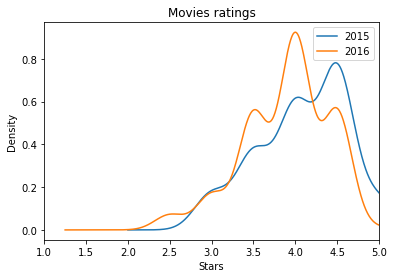

In [8]:
ratings_2015["Fandango_Stars"].plot.kde(label='2015', legend=True)
ratings_2016["fandango"].plot.kde(label='2016', legend=True)

plt.xlim(1, 5)
plt.title("Movies ratings")
plt.xlabel('Stars')

We can see that both distributions are strongly left-skewed, which suggests that movies on Fandango are given mostly high fan ratings. Also, the 2016 distribution is slightly shifted to the left relative to the 2015 distribution. This shift suggests that there was indeed a difference between Fandango's ratings for popular movies in 2015 and 2016. Let’s analyse this in more detail by calculating the frequency tables of the two distributions.

In [9]:
# Ratings for 2015
ratings_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [10]:
# Ratings for 2016
ratings_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Now we'll compute the mean, the median, and the mode for both distributions.

In [11]:
mean_2015 = ratings_2015['Fandango_Stars'].mean()
mean_2016 = ratings_2016['fandango'].mean()

median_2015 = ratings_2015['Fandango_Stars'].median()
median_2016 = ratings_2016['fandango'].median()

mode_2015 = ratings_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = ratings_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


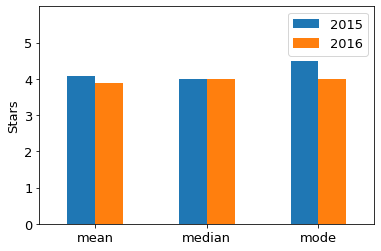

In [12]:
summary.plot.bar(y=["2015","2016"], rot=0, fontsize=13)

plt.ylim(0,6)
plt.yticks(range(0,6))
plt.ylabel('Stars', fontsize=13)
plt.legend(fontsize=13)
plt.show()

# Conclusion

We can conclude that popular movies released in 2016 were on average rated lower on Fandango than those released in 2015. It does seem that Fandango fixed the bug in their system related to the biased rounding off.